In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Loading the dataset
data = pd.read_csv('adult_with_headers.csv')
#data exploration
print(data.info())
print(data.describe())
data = data.replace('?', np.nan)
data = data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  3

In [3]:
numerical_features = ['age', 'fnlwgt', 'education_num', 'hours_per_week']
# Standard Scaling
scaler_standard = StandardScaler()
data_standard_scaled = scaler_standard.fit_transform(data[numerical_features])
# Min-Max Scaling
scaler_minmax = MinMaxScaler()
data_minmax_scaled = scaler_minmax.fit_transform(data[numerical_features])
data_standard_scaled_df = pd.DataFrame(data_standard_scaled, columns=numerical_features)
data_minmax_scaled_df = pd.DataFrame(data_minmax_scaled, columns=numerical_features)

# Discussing each scaling techniques when to use :
# - Standard Scaling: Used when data follows a normal distribution.
# - Min-Max Scaling: Useful when the data doesn't follow a normal distribution and needs to be scaled to a fixed range, like [0, 1].


In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd
data = pd.DataFrame({
    'workclass': ['Private', 'Self-emp-not-inc', 'Private', 'Federal-gov'],
    'education': ['Bachelors', 'HS-grad', 'Masters', 'Bachelors'],
    'marital_status': ['Married-civ-spouse', 'Never-married', 'Divorced', 'Married-civ-spouse'],
    'occupation': ['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Exec-managerial'],
    'relationship': ['Husband', 'Not-in-family', 'Not-in-family', 'Husband'],
    'race': ['White', 'Black', 'White', 'White'],
    'sex': ['Male', 'Female', 'Female', 'Male'],
    'native_country': ['United-States', 'Mexico', 'United-States', 'Canada']
})
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
# Applying One-Hot Encoding with less than 5 categories
one_hot_columns = ['sex', 'relationship']
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
data_one_hot = pd.DataFrame(one_hot_encoder.fit_transform(data[one_hot_columns]),
                            columns=one_hot_encoder.get_feature_names_out(one_hot_columns))

# Applying Label Encoding with more than 5 categories
label_columns = ['workclass', 'education', 'marital_status', 'occupation', 'native_country']
label_encoder = LabelEncoder()

for col in label_columns:
    data[col] = label_encoder.fit_transform(data[col])
# Concatenate the One-Hot Encoded columns back to the original data
data_encoded = pd.concat([data, data_one_hot], axis=1).drop(one_hot_columns, axis=1)
# Displaying the encoded dataset
print(data_encoded.head())


   workclass  education  marital_status  occupation   race  native_country  \
0          1          0               1           0  White               2   
1          2          1               2           1  Black               1   
2          1          2               0           2  White               2   
3          0          0               1           0  White               0   

   sex_Male  relationship_Not-in-family  
0       1.0                         0.0  
1       0.0                         1.0  
2       0.0                         1.0  
3       1.0                         0.0  


In [ ]:
Pros and Cons of One-Hot Encoding and Label Encoding:
One-Hot Encoding:
Pros:
No Ordinal Relationship: One-Hot Encoding create binary columns for each category, which means there is no ordinal relationship introduced among categories
Cons:
High Dimensionality:It Can lead to a large increase in the number of features if the categorical variable has many unique categories, Potentially causing the "curse of dimensionality"


Label Encoding:
Pros:
Reduced Dimensionality: It converts categories into integers, which keeps the feature set smaller, avoiding the issues of high dimensionality.
Cons:
Ordinal Relationship: It creates an ordinal relationship between categories that may not exist

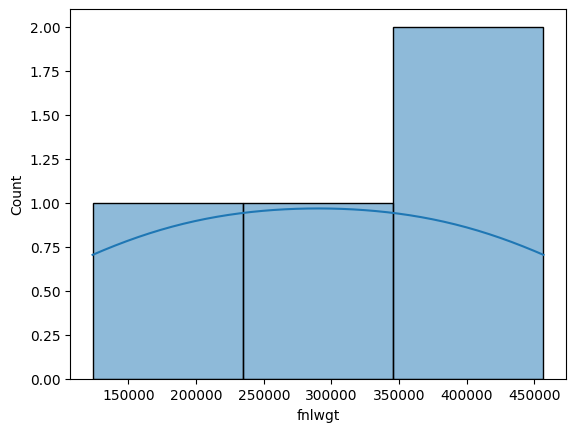

   age  education  hours-per-week  fnlwgt  education_num  education_hours  \
0   25  Bachelors              40  123456              0                0   
1   60    HS-grad              30  234567              1               30   
2   35    Masters              50  345678              2              100   
3   45  Bachelors              60  456789              0                0   

   senior_citizen  fnlwgt_log  
0               0   11.723648  
1               1   12.365501  
2               0   12.753266  
3               0   13.031979  


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
data = pd.DataFrame({
    'age': [25, 60, 35, 45],
    'education': ['Bachelors', 'HS-grad', 'Masters', 'Bachelors'],
    'hours-per-week': [40, 30, 50, 60],
    'fnlwgt': [123456, 234567, 345678, 456789]
})
label_encoder = LabelEncoder()
data['education_num'] = label_encoder.fit_transform(data['education'])

# Feature Engineering
data['education_hours'] = data['education_num'] * data['hours-per-week']
data['senior_citizen'] = np.where(data['age'] >= 60, 1, 0)
# Check for skewness
sns.histplot(data['fnlwgt'], kde=True)
plt.show()
# Applying log transformation if skewed
data['fnlwgt_log'] = np.log1p(data['fnlwgt'])
print(data)


In [6]:
#Feature selection
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
data = pd.DataFrame({
    'age': [25, 60, 35, 45],
    'education_num': [1, 2, 3, 1],
    'hours-per-week': [40, 30, 50, 60],
    'fnlwgt': [123456, 234567, 345678, 456789]
})
numerical_features = ['age', 'fnlwgt', 'education_num', 'hours-per-week']
#Isolation Forest
iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(data[numerical_features])
# Remove outliers
data = data[outliers == 1]
# Display the cleaned dataset without outliers
print(data)


   age  education_num  hours-per-week  fnlwgt
0   25              1              40  123456
2   35              3              50  345678
3   45              1              60  456789


In [12]:
### Discussion: Outliers can skew the data and negatively impact the performance of models by introducing noise.


In [14]:
!pip install ppscore

In [18]:
import pandas as pd
import numpy as np
import ppscore as pps


data = pd.DataFrame({
    'age': [25, 60, 35, 45],
    'education_num': [1, 2, 3, 1],
    'hours-per-week': [40, 30, 50, 60],
    'fnlwgt': [123456, 234567, 345678, 456789],
    'income': ['<=50K', '>50K', '>50K', '<=50K']
})
# Computing the PPS matrix
pps_matrix = pps.matrix(data)
# Displaying PPS matrix
top_pps = pps_matrix[['x', 'y', 'ppscore']].sort_values(by='ppscore', ascending=False).head(10)
print("Top 10 PPS Scores:")
print(top_pps)
# Comparing with correlation matrix
corr_matrix = data.select_dtypes(include=[np.number]).corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

C:\Users\jammu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ppscore\calculation.py:206: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dtype(series)
C:\Users\jammu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ppscore\calculation.py:206: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dtype(series)
C:\Users\jammu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ppscore\calculation.py:206: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dtype(series)
C:\Users\jammu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ppscore\calculation.py:206: FutureWarning: is_categorical_dtype is deprecated and will be removed in a fu

Top 10 PPS Scores:
                 x               y   ppscore
0              age             age  1.000000
6    education_num   education_num  1.000000
18          fnlwgt          fnlwgt  1.000000
12  hours-per-week  hours-per-week  1.000000
24          income          income  1.000000
21          income   education_num  0.333333
15          fnlwgt             age  0.000000
23          income          fnlwgt  0.000000
22          income  hours-per-week  0.000000
20          income             age  0.000000

Correlation Matrix:
                     age  education_num  hours-per-week    fnlwgt
age             1.000000       0.145741       -0.302636  0.302636
education_num   0.145741       1.000000       -0.134840  0.134840
hours-per-week -0.302636      -0.134840        1.000000  0.800000
fnlwgt          0.302636       0.134840        0.800000  1.000000


In [20]:

##Discussion: PPS captures non-linear relationships, while correlation measures linear relationships.PPS can uncover patterns that correlation might miss.